## K Nearest Neighbour

### Reading Material:
[K Nearest Neighbors Classifier](https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265) <br>
[Nearest Neighbour Classifier](https://towardsdatascience.com/nearest-neighbour-classifier-4ad15516873)

In [1]:
#Importing Libraries
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('KNN')

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
standardscalar=StandardScaler()

In [8]:
standardscalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
normalised_data=standardscalar.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
normalised_data

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [12]:
scaled_df=pd.DataFrame(normalised_data,columns=df.columns[:-1])

In [20]:
scaled_df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [14]:
from sklearn.model_selection import train_test_split

In [21]:
#Spliting Data into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['TARGET CLASS'], test_size=0.33, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=1)

In [28]:
#Training the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
pred=knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93       155
          1       0.94      0.93      0.93       175

avg / total       0.93      0.93      0.93       330



In [32]:
#Finding the best 'k' value
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))


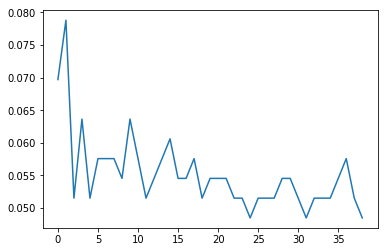

In [35]:
plt.plot(error_rate)

In [36]:
#Setting value of k=24
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [37]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       155
          1       0.95      0.95      0.95       175

avg / total       0.95      0.95      0.95       330



## Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
<img src="CM.png">

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
print(confusion_matrix(y_test,pred))

[[147   8]
 [  9 166]]
